In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/Projects/LRHousing`


In [87]:
using Gadfly
LRHousing = include("../src/LRHousing.jl")
using Setfield

In [88]:
train_data = LRHousing.read_data("../data/train.csv");

In [89]:
pl = LRHousing.DataPipeline(train_data; ignore=[:Id], target=[:SalePrice]);

In [90]:
train_preprocessed = pl(train_data, standard=true, log_inplace=false);

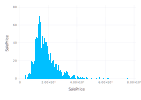

In [91]:
plot(train_preprocessed, x=:SalePrice, y=:SalePrice, Geom.histogram)

In [93]:
fm = LRHousing.create_formula(pl, :SalePrice);
model = LRHousing.lm(fm, train_preprocessed)

StatsModels.TableRegressionModel{GLM.LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

:(log1p(SalePrice)) ~ 1 + OverallQual + OverallCond + YearBuilt + YearRemodAdd + BsmtFullBath + FullBath + HalfBath + BedroomAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars + GarageArea + MoSold + YrSold + MSZoning + Street + LotShape + LandContour + Utilities + LotConfig + LandSlope + Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinType2 + Heating + HeatingQC + CentralAir + Electrical + KitchenQual + Functional + FireplaceQu + GarageType + GarageFinish + GarageQual + GarageCond + PavedDrive + SaleType + SaleCondition + :(log1p(MSSubClass)) + :(log1p(LotFrontage)) + :(log1p(LotArea)) + :(log1p(MasVnrArea)) + :(log1p(Bsmt

In [98]:
test = LRHousing.read_data("../data/test.csv")
test.SalePrice = fill(0, size(test, 1))
test_p = pl(test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour
,Int64,Float64,Cat…,Float64,Float64,Cat…,String?,Cat…,Cat…
1,1461,20.0,RH,80.0,11622.0,Pave,missing,Reg,Lvl
2,1462,20.0,RL,81.0,14267.0,Pave,missing,IR1,Lvl
3,1463,60.0,RL,74.0,13830.0,Pave,missing,IR1,Lvl
4,1464,60.0,RL,78.0,9978.0,Pave,missing,IR1,Lvl
5,1465,120.0,RL,43.0,5005.0,Pave,missing,IR1,HLS
6,1466,60.0,RL,75.0,10000.0,Pave,missing,IR1,Lvl
7,1467,20.0,RL,68.5804,7980.0,Pave,missing,IR1,Lvl
8,1468,60.0,RL,63.0,8402.0,Pave,missing,IR1,Lvl
9,1469,20.0,RL,85.0,10176.0,Pave,missing,Reg,Lvl


In [106]:
fm

FormulaTerm
Response:
  (SalePrice)->log1p(SalePrice)
Predictors:
  1
  OverallQual(unknown)
  OverallCond(unknown)
  YearBuilt(unknown)
  YearRemodAdd(unknown)
  BsmtFullBath(unknown)
  FullBath(unknown)
  HalfBath(unknown)
  BedroomAbvGr(unknown)
  TotRmsAbvGrd(unknown)
  Fireplaces(unknown)
  GarageYrBlt(unknown)
  GarageCars(unknown)
  GarageArea(unknown)
  MoSold(unknown)
  YrSold(unknown)
  MSZoning(unknown)
  Street(unknown)
  LotShape(unknown)
  LandContour(unknown)
  Utilities(unknown)
  LotConfig(unknown)
  LandSlope(unknown)
  Neighborhood(unknown)
  Condition1(unknown)
  Condition2(unknown)
  BldgType(unknown)
  HouseStyle(unknown)
  RoofStyle(unknown)
  RoofMatl(unknown)
  Exterior1st(unknown)
  Exterior2nd(unknown)
  MasVnrType(unknown)
  ExterQual(unknown)
  ExterCond(unknown)
  Foundation(unknown)
  BsmtQual(unknown)
  BsmtCond(unknown)
  BsmtExposure(unknown)
  BsmtFinType1(unknown)
  BsmtFinType2(unknown)
  Heating(unknown)
  HeatingQC(unknown)
  CentralAir(unknown)
 

In [99]:
using GLM

In [102]:
test.SalePrice = exp.(predict(model, test_p))

1459-element Vector{Float64}:
 121788.4208348676
 155607.85638668202
 188704.62250815012
 200425.35449023274
 200433.36977686887
 172890.21156495775
 177204.7699361028
 160568.56652346032
 199446.3431647415
 119319.72615092492
 162418.62370012855
  96581.93049853388
  95517.37297952118
      ⋮
 127176.5177752602
 138579.75875924173
  74520.62473776378
  79414.42802036446
 150974.87021468978
  78902.0248159617
  78530.384118584
  87327.45039938788
  82095.88783489852
 173820.28017051303
 122658.29277558111
 217794.59690343426

In [104]:
using CSV, DataFrames

In [107]:
# CSV.write("../data/result2.csv", select(test, ["Id", "SalePrice"]))

In [115]:
methodswith(supertype(model |> typeof))

[1] cooksdistance(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:382
[2] crossmodelmatrix(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:366
[3] dof_residual(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:416
[4] fitted(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:330
[5] leverage(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:373
[6] meanresponse(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:351
[7] modelmatrix(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:358
[8] predict(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:400
[9] predict!(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:409
[10] residuals(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:389
[11] response(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:337
[12] responsename(model::RegressionModel) in StatsBase at /home/hung/.cache/julia/packages/StatsBase/IiL4F/src/statmodels.jl:344

In [171]:
modelcoefs = coeftable(model) |> DataFrame

,Name,Coef.,Std. Error,t,Pr(>|t|),Lower 95%
,String,Float64,Float64,Float64,Float64,Float64
1,(Intercept),5.20678,0.359893,14.4676,6.5415e-44,4.5007
2,OverallQual,0.0528877,0.00629235,8.40509,1.17344e-16,0.0405427
3,OverallCond,0.0422043,0.00435684,9.68691,1.96895e-21,0.0336566
4,YearBuilt,0.0574779,0.0103481,5.55443,3.41378e-8,0.0371759
5,YearRemodAdd,0.0151493,0.00511746,2.96032,0.00313234,0.00510938
6,BsmtFullBath,0.0123464,0.00454357,2.71734,0.00667376,0.00343237
7,FullBath,0.0117607,0.00538848,2.18257,0.029257,0.00118906
8,HalfBath,0.00759392,0.00473647,1.60329,0.109129,-0.00169857
9,BedroomAbvGr,-0.00111542,0.00498965,-0.223546,0.823148,-0.0109046


In [210]:
model

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

:(log1p(SalePrice)) ~ 1 + OverallQual + OverallCond + YearBuilt + YearRemodAdd + BsmtFullBath + FullBath + HalfBath + BedroomAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars + GarageArea + MoSold + YrSold + MSZoning + Street + LotShape + LandContour + Utilities + LotConfig + LandSlope + Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinType2 + Heating + HeatingQC + CentralAir + Electrical + KitchenQual + Functional + FireplaceQu + GarageType + GarageFinish + GarageQual + GarageCond + PavedDrive + SaleType + SaleCondition + :(log1p(MSSubClass)) + :(log1p(LotFrontage)) + :(log1p(LotArea)) + :(log1p(MasVnrArea)) + :(log1p(BsmtFinS

In [213]:
Pkg.add("Cairo")
using Cairo

    Updating registry at `~/.cache/julia/registries/General.toml`
   Resolving package versions...
    Updating `~/Projects/LRHousing/Project.toml`
  [159f3aea] + Cairo v1.0.5
  No Changes to `~/Projects/LRHousing/Manifest.toml`


In [215]:
let df = modelcoefs
    df = filter(x -> x["Lower 95%"] * x["Upper 95%"] > 0, df)
    df = sort(df, "Coef.")
    
    set_default_plot_size(30cm, 0.5cm * size(df, 1))
    p = plot(df, Geom.bar(;orientation=:horizontal), x=Symbol("Coef."), y=:Name, height=120cm)
    draw(PNG("/tmp/coef.png"), p)
end

┌ Warning: height is not a recognized aesthetic. Ignoring.
└ @ Gadfly /home/hung/.cache/julia/packages/Gadfly/zv8pp/src/mapping.jl:63

(process:7035): Pango-WARNING **: 22:53:33.274: pango_layout_set_markup_with_accel: Error on line 1: Entity did not end with a semicolon; most likely you used an ampersand character without intending to start an entity — escape ampersand as &amp;


In [217]:
using HypothesisTests

In [219]:
using Distributions

In [225]:
let res = residuals(model)
    res = res .- mean(res) ./ std(res)
    dist = Normal(0, 1)
    OneSampleADTest(res |> sort, dist)
end

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-06

Details:
    number of observations:   1460
    sample mean:              -9.514945908798438e-14
    sample SD:                0.09317735923817483
    A² statistic:             459.7004613670281
